<a href="https://colab.research.google.com/github/t6nand/mltasks/blob/master/logistics_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

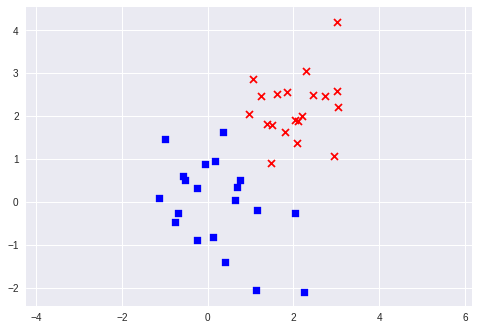

cost: 35.831
Initial Gradient:  [[  0.99136]
 [-13.57827]
 [-14.32925]]
cost: 1.573


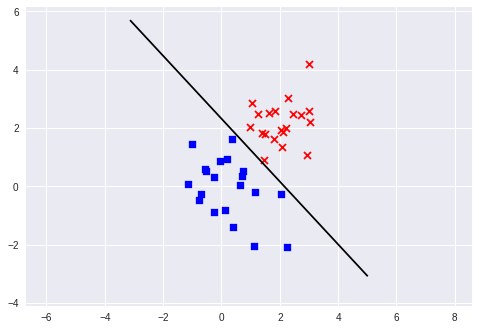

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from dataset1_logreg import DataSet

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Initialization of Model Parameter Vector
w = np.array([0.1, 0.1, 0.1]).reshape((-1,1))

#use to compute normalizatiom parameters
def get_norm_params(x_data):
  mean_x      = np.mean(x_data[:], axis=1).reshape((-1,1))
  stdd_x      = np.std(x_data[:], axis=1).reshape((-1,1))
  return mean_x, stdd_x

#import data, plot data
y_D, x_D = DataSet.get_data()
DataSet.plot_data()
plt.show()

#normalization parameters
mean_x, stdd_x = get_norm_params(x_D)   


# Predict output function. Output represents the probability that it belongs to 
# class y E {0, 1}
def predict_y1(x_arr):
  x_arr = (x_arr - mean_x) / stdd_x
  a = sigmoid((w[0][0] + w[1][0]*x_arr[0] + w[2][0]*x_arr[1]).reshape((1, -1)))
  return a

# Function to calclate cross entropy cost function
def ce_cost(x_arr, y_arr, predict_f):    
  a = predict_y1(x_D)
  cost = np.sum((-y_D * np.log2(a)) - ((1-y_D) * np.log2(1-a))) #CROSS ENTROPY COST
  return cost

print('cost: %.3f' % ce_cost(x_D, y_D, predict_y1))

a = predict_y1(x_D)
x_train = (x_D - mean_x)/ stdd_x
x_train = np.vstack( (np.ones((1,x_train.shape[1])), x_train) )
grad_w_initial = x_train.dot( (a - y_D).T )
print('Initial Gradient: ',  grad_w_initial)

#Gradient Descent:
update_iterations = 1000
learning_rate = 0.01

for i in range(update_iterations):
  a = predict_y1(x_D)
  grad_w = x_train.dot( (a - y_D).T )
  if np.prod(grad_w) == 0:
    break
  else:
    w = w - (learning_rate * grad_w)


DataSet.plot_decision_boundary(predict_y1)
print('cost: %.3f' % ce_cost(x_D, y_D, predict_y1))